# Hierarchical Clustering

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# Dropping unnecessary columns
df.drop(['CustomerID', 'Genre', 'Age'], axis=1, inplace=True)
df.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [4]:
# Normalizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [5]:
# Selecting relevant features
x=df.iloc[:,:2].values

### **Dendrogram**

**To find optimal no.of clusters**

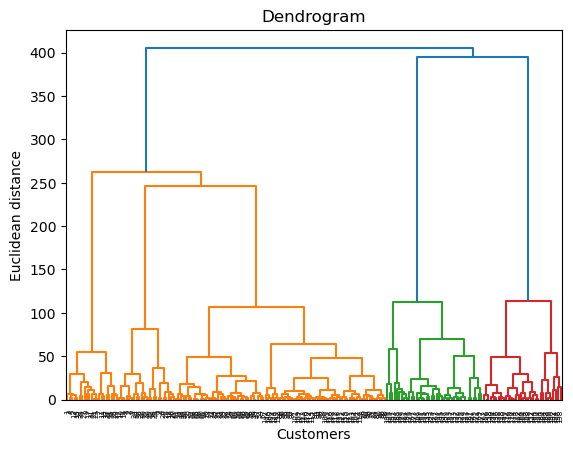

In [6]:
import scipy.cluster.hierarchy as sch
data=sch.linkage(x,method='ward')
dendrogram=sch.dendrogram(data)
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distance')
plt.show()

- This portion of the code generates a dendrogram, which is a tree-like diagram showing the hierarchical relationships between data points.
- sch.linkage(x, method='ward'): Performs hierarchical clustering using the Ward method, which minimizes the variance within each cluster.
- sch.dendrogram(data): Plots the dendrogram to visually understand how clusters are formed at different levels of distance.

- Affinity refers to a measure of similarity or closeness between data points.
- Example: In clustering methods like Affinity Propagation, the term describes how much one point prefers to belong to another as a cluster center.


### **Hierarchical modelling**

**Agglomerative Clustering and Prediction**

In [8]:
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=5,metric='euclidean',linkage='ward')
y_hc=hc.fit_predict(x)

In [9]:
y_hc

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

- Performs Agglomerative Clustering, which is a type of hierarchical clustering that builds the cluster hierarchy from the bottom up.
- AgglomerativeClustering(n_clusters=5, ...): Specifies the number of clusters as 5, using Euclidean distance to measure similarity, and the Ward linkage method.
- fit_predict(x): Fits the model to the data (x) and returns the cluster labels (y_hc).
- The plot displays the Euclidean distance for the clusters.

**Assigning Cluster Labels to DataFrame**

In [10]:
df['cluster']=pd.DataFrame(y_hc)
df

,Annual Income (k$),Spending Score (1-100),cluster
0,15,39,4
1,15,81,3
2,16,6,4
3,16,77,3
4,17,40,4
...,...,...,...
195,120,79,2
196,126,28,0
197,126,74,2
198,137,18,0


- This code assigns the predicted cluster labels (y_hc) to a new column in the DataFrame df.
- After clustering, the df DataFrame will have an additional column showing which cluster each data point belongs to.

**Scatter Plot of Data**

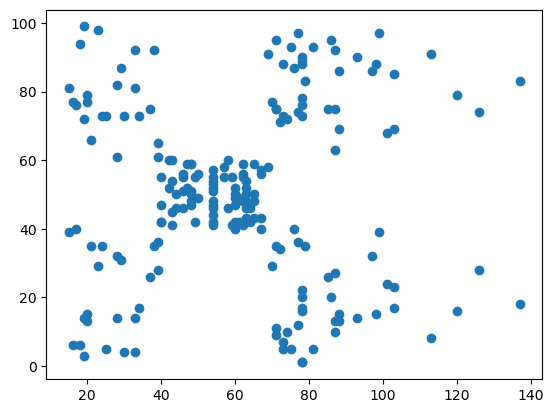

In [11]:
a=df.iloc[:,0]
b=df.iloc[:,1]

plt.scatter(a,b)
plt.show()

- This code visualizes the data points in a 2D scatter plot, based on the first two columns of the DataFrame.
- a and b represent the first and second columns (features) of the DataFrame, which are plotted on the x and y axes.

**Color-Coded Scatter Plot for Each Cluster**

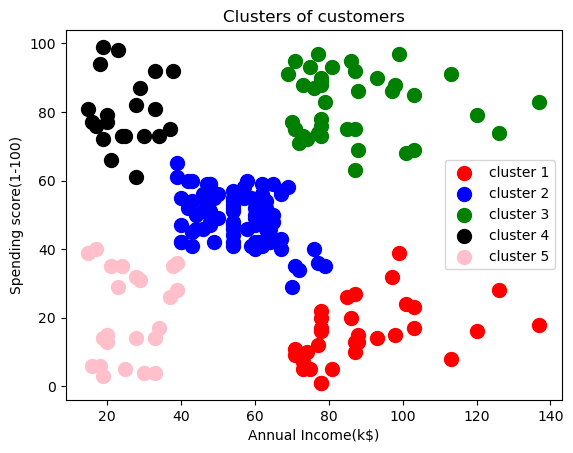

"\nfor i in range(5):\n    plt.scatter(x[y_hc == i, 0], x[y_hc == i, 1], s=100, label=f'Cluster {i+1}')\n\n"

In [12]:
plt.scatter(x[y_hc == 0,0],x[y_hc == 0,1],s=100,c='red',label='cluster 1')
plt.scatter(x[y_hc == 1,0],x[y_hc == 1,1],s=100,c='blue',label='cluster 2')
plt.scatter(x[y_hc == 2,0],x[y_hc == 2,1],s=100,c='green',label='cluster 3')
plt.scatter(x[y_hc == 3,0],x[y_hc == 3,1],s=100,c='black',label='cluster 4')
plt.scatter(x[y_hc == 4,0],x[y_hc == 4,1],s=100,c='pink',label='cluster 5')

plt.title('Clusters of customers')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending score(1-100)')
plt.legend()
plt.show()

'''
for i in range(5):
    plt.scatter(x[y_hc == i, 0], x[y_hc == i, 1], s=100, label=f'Cluster {i+1}')

'''

- This section visualizes the clustering result with different colors for each cluster.
- For each cluster (y_hc == 0, 1, 2, 3, 4), the data points are plotted using a specific color and labeled with the respective cluster number.
- The plot is customized with a title, labels, and a legend, showing the relationship between annual income and spending score for each cluster.

**Key Observations**

- 1.Dendrogram Interpretation:

The dendrogram is the visual representation of the hierarchical clustering process.
The height at which the branches merge indicates the distance between clusters. Lower heights mean the clusters are more similar.
The dendrogram helps identify the number of clusters by cutting it at a certain height. A sharp cut-off indicates natural cluster separation.
- 2.Agglomerative vs Divisive Hierarchical Clustering:

The code uses agglomerative hierarchical clustering, which starts with individual data points and progressively merges the closest clusters.
Divisive hierarchical clustering, in contrast, starts with the entire dataset as a single cluster and splits it iteratively.
Agglomerative is the most commonly used approach for clustering, especially in practical applications.
- 3.Ward’s Linkage Method:

The Ward’s method minimizes the variance within each cluster, making it a suitable method for minimizing the sum of squared differences within clusters.
This method typically leads to more compact clusters and is widely used in clustering tasks.
- 4.Choosing the Number of Clusters:

The number of clusters, n_clusters, was set to 5 in your code. However, this should ideally be determined by analyzing the dendrogram or using metrics like the elbow method or silhouette score.
Dendrogram analysis helps visually determine the natural number of clusters by observing the large gaps between merges.
-5.Euclidean Distance:

The Euclidean distance metric is used to measure the similarity between data points. It is the most common distance metric in clustering tasks, especially when data points are multidimensional.
- 6.Cluster Interpretation:

After clustering, the cluster labels (y_hc) can be used to assign each data point to a cluster. Visualizing the clusters can help understand the distribution of data points within each cluster.
In your plot, each cluster is colored differently to make it easier to visually distinguish between them. You can analyze the characteristics of each cluster to understand the distinct segments in the data (e.g., customer segments in the case of the mall dataset).
- 7.Visualizing Clusters:

Scatter plots are a great way to visualize clustering results, especially when dealing with 2D data. Each cluster can be represented with a distinct color, which helps in understanding how well the data has been grouped.
- 8.Applications:

Hierarchical clustering is particularly useful in scenarios where the number of clusters is not known upfront and you want to explore the data’s natural grouping.
It can be used for customer segmentation (as in your case), biological data analysis (e.g., gene expression), and document clustering.

**Final Thoughts**

- Hierarchical clustering is a powerful technique, especially when you don’t know the number of clusters in advance. By visualizing the dendrogram and evaluating the clusters, you can make informed decisions about customer segmentation or other similar tasks. It’s a flexible method, but requires careful analysis and validation of cluster quality to ensure meaningful results.

### **Project by : SIREESHA RAGIPATI**